<a href="https://colab.research.google.com/github/Jainharshit09/BDA/blob/main/pre%20Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Shuffle the dataSet**
In the feature extraction file, the extracted features of legitmate & phishing url datasets are just concatenated without any shuffling. This resulted in top 500 rows of legitimate url data & bottom 416 of phishing url data.

In [26]:
import pandas as pd
from sklearn.utils import shuffle
data0 = pd.read_csv('urldata.csv')
legitimate_websites = data0[data0['Label'] == 0]
phishing_websites = data0[data0['Label'] == 1]
legitimate_websites_shuffled = shuffle(legitimate_websites)
phishing_websites_shuffled = shuffle(phishing_websites)
shuffled_data = pd.concat([legitimate_websites_shuffled, phishing_websites_shuffled])
shuffled_data = shuffle(shuffled_data)
shuffled_data.reset_index(drop=True, inplace=True)
print(shuffled_data.head())
shuffled_data.to_csv('shuffled_urldata.csv', index=False)


                                        Domain  Have_IP  Have_At  URL_Length  \
0                 reagan-106928.weeblysite.com        0        0           0   
1                     trezorsbridge.gitbook.io        0        0           0   
2  pub-ca1f7c0d107c4fe5a4f42bfad0c9003a.r2.dev        0        0           1   
3  pub-e217b78ed9ac48a69ba8585c86609fc9.r2.dev        0        0           1   
4                                   mylust.com        0        0           1   

   URL_Depth  Redirection  https_Domain  TinyURL  Prefix/Suffix  DNS_Record  \
0          0            0             0        0              1           0   
1          1            0             0        0              0           0   
2          1            0             0        0              1           0   
3          1            0             0        0              1           0   
4          3            0             0        1              0           0   

   Web_Traffic  Domain_Age  Domain_End  iFra

#**1. Loading Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
data0 = pd.read_csv('shuffled_urldata.csv')
data0.tail(10)

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
907,icicibank.com,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,1,0
908,oielcel.ink,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
909,kickass.to,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
910,variety.com,0,0,1,4,0,0,0,0,0,1,0,0,0,0,1,0,0
911,swappauto.staging.lcsolutions.it,0,0,1,2,0,0,0,0,0,1,1,1,1,1,1,0,1
912,codecanyon.net,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,1,0
913,metro.co.uk,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,0,0
914,qz.com,0,0,1,2,0,0,0,0,0,1,0,1,0,0,1,0,0
915,kizi.com,0,0,1,2,0,0,0,0,0,1,0,1,1,0,1,0,0
916,doikwamsndjendhf.weebly.com,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1


# **2.  Familiarizing with Data**

In [28]:
data0.shape

(917, 18)

In [29]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [30]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         917 non-null    object
 1   Have_IP        917 non-null    int64 
 2   Have_At        917 non-null    int64 
 3   URL_Length     917 non-null    int64 
 4   URL_Depth      917 non-null    int64 
 5   Redirection    917 non-null    int64 
 6   https_Domain   917 non-null    int64 
 7   TinyURL        917 non-null    int64 
 8   Prefix/Suffix  917 non-null    int64 
 9   DNS_Record     917 non-null    int64 
 10  Web_Traffic    917 non-null    int64 
 11  Domain_Age     917 non-null    int64 
 12  Domain_End     917 non-null    int64 
 13  iFrame         917 non-null    int64 
 14  Mouse_Over     917 non-null    int64 
 15  Right_Click    917 non-null    int64 
 16  Web_Forwards   917 non-null    int64 
 17  Label          917 non-null    int64 
dtypes: int64(17), object(1)
memory

# **3. Visualizing the data**

Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

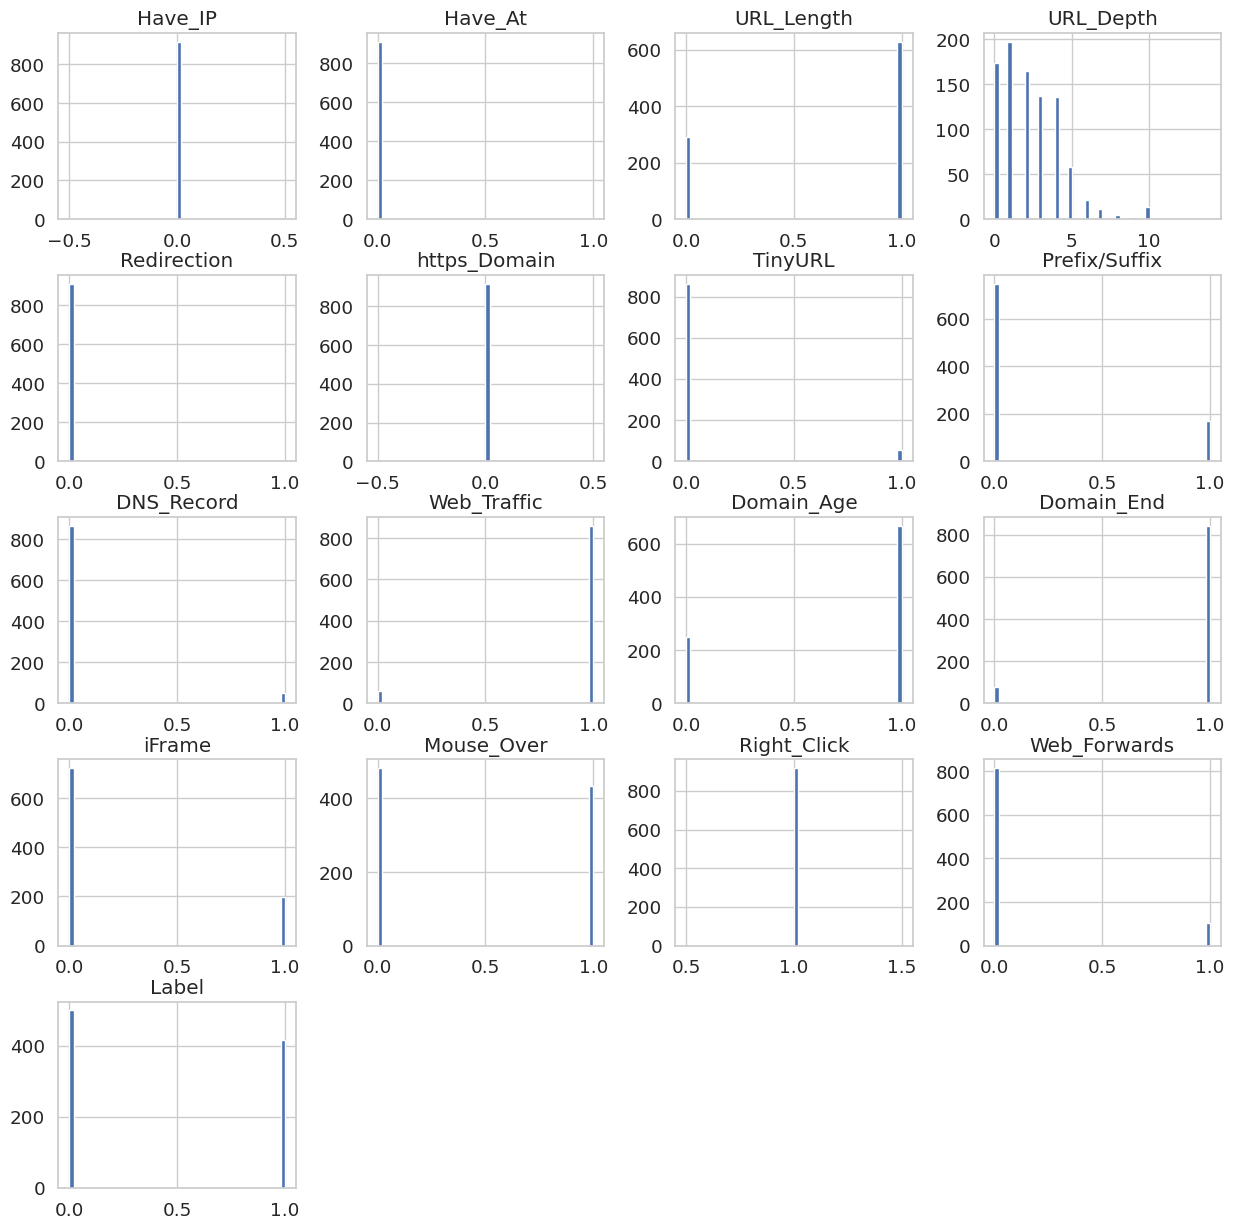

In [31]:
data0.hist(bins = 50,figsize = (15,15))
plt.show()

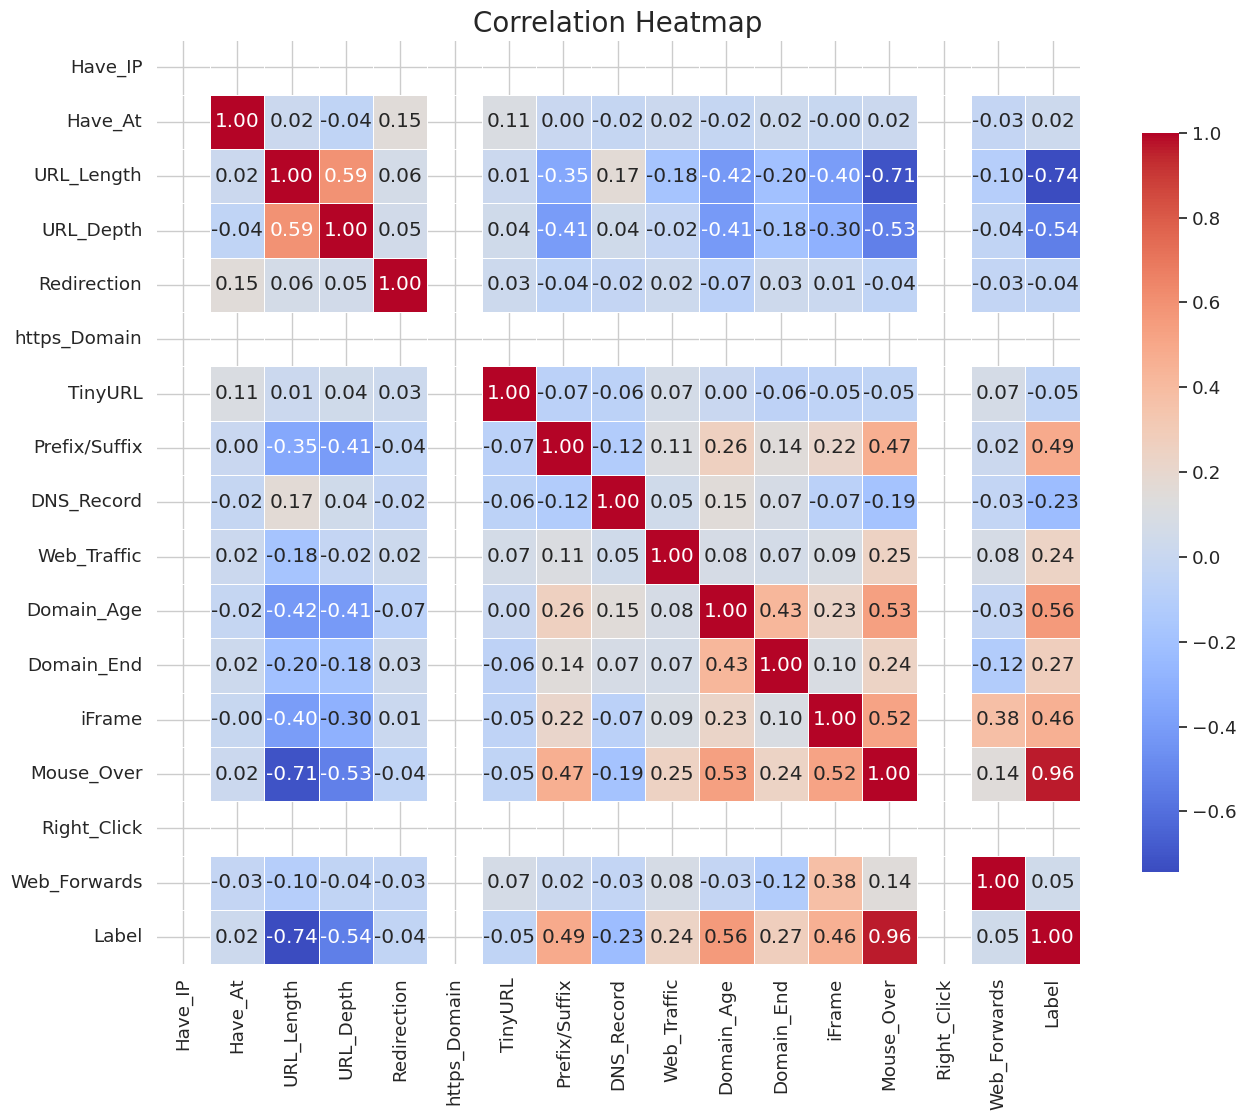

In [32]:
numeric_data = data0.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Set up the figure size and aesthetics
plt.figure(figsize=(16, 12))
sns.set(font_scale=1.2)  # Increase font size for better readability
sns.set_style('whitegrid')

# Create the heatmap
heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,  # Show the correlation coefficients
    fmt='.2f',  # Format the annotation to 2 decimal places
    cmap='coolwarm',  # Use a diverging color palette
    square=True,  # Make squares in the heatmap
    cbar_kws={"shrink": .8},  # Adjust color bar size
    linewidths=0.5,  # Add lines between cells
)

# Set the title and show the plot
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

# **4. Data Preprocessing & EDA**

In [35]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,917.0,917.000000,917.000000,917.000000,917.000000,917.0,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.0,917.000000,917.000000
mean,0.0,0.005453,0.684842,2.363141,0.008724,0.0,0.059978,0.185387,0.057797,0.935660,0.726281,0.917121,0.213740,0.474373,1.0,0.113413,0.454744
std,0.0,0.073680,0.464832,2.036800,0.093045,0.0,0.237576,0.388823,0.233487,0.245492,0.446110,0.275850,0.410169,0.499615,0.0,0.317270,0.498219
min,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,0.0,0.000000,1.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
75%,0.0,0.000000,1.000000,4.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.0,0.000000,1.000000
max,0.0,1.000000,1.000000,14.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the 'Domain' column from the dataset.

In [36]:
data = data0.drop(['Domain'], axis = 1).copy()

In [37]:

#checking the data for null or missing values
data.isnull().sum()

,0
Have_IP,0
Have_At,0
URL_Length,0
URL_Depth,0
Redirection,0
https_Domain,0
TinyURL,0
Prefix/Suffix,0
DNS_Record,0
Web_Traffic,0


#**5. Splitting the Data**


In [38]:
y=data['Label']
X = data.drop('Label',axis=1)
X.shape,y.shape

((917, 16), (917,))

In [39]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((733, 16), (184, 16))